## Телевидение, шоу в перерывах и Большая игра
<p>Любите вы футбол или нет, Суперкубок - это зрелище. На вашей вечеринке по случаю Суперкубка найдется что-нибудь для каждого. Драма в виде поражений, ответных ударов и споров для спортивного болельщика. Есть смехотворно дорогие рекламные ролики, некоторые веселые, другие выворачивающие наизнанку, заставляющие задуматься и странные. В перерывах между выступлениями выступают крупнейшие музыканты мира, иногда <a href="https://youtu.be/ZD1QrIe--_Y?t=14">катающиеся на гигантских механических тиграх</a> или <a href="https://youtu.be/mjrdywp5nyE?t=62">прыгающие с крыши стадиона</a>. Это шоу, детка. И в этом блокноте мы собираемся выяснить, как некоторые элементы этого шоу взаимодействуют друг с другом. После небольшого изучения и очистки наших данных мы собираемся ответить на такие вопросы, как:</p>
<ul>
<li>Каковы самые экстремальные исходы игр?</li>
<li>Как игра влияет на телезрителей?</li>
<li>Как со временем менялись телезрители, телевизионные рейтинги и стоимость рекламы?</li>
<li>Кто самые плодовитые музыканты с точки зрения выступлений в перерыве шоу?</li>
</ul>

<p>Набор данных, который мы будем использовать, был <a href="https://en.wikipedia.org/wiki/Web_scraping">извлечен</a> и отполирован из Википедии. Он состоит из трех CSV-файлов, один с <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions">игровыми данными</a>, один с <a href="https://en.wikipedia.org/wiki/Super_Bowl_television_ratings">телевизионными данными</a> и один с <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_halftime_shows ">данные о музыкантах в перерыве</a> для всех 52 Суперкубков до 2018 года. Давайте посмотрим, используя <code>display()</code> вместо <code>print()</code>, поскольку его вывод намного красивее в записных книжках Jupyter.</p>

### 1. Импорт данных и отображение первых строк

Описание задачи:
У вас есть несколько файлов CSV с данными о Супербоуле, телевизионных трансляциях и артистах полувременного шоу. Ваша задача - импортировать эти данные в виде DataFrame с помощью библиотеки pandas и отобразить первые пять строк каждого DataFrame.

#### Инструкции

Импортируйте библиотеку pandas с псевдонимом pd.
Используйте функцию pd.read_csv() для загрузки данных из каждого файла CSV в соответствующий DataFrame (super_bowls, tv, halftime_musicians).
Отобразите первые пять строк каждого DataFrame с помощью функции display().

In [25]:
# Импортировать pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузить данные CSV в DataFrames
super_bowls = pd.read_csv('datasets/super_bowls.csv')
tv = pd.read_csv('datasets/tv.csv')
halftime_musicians = pd.read_csv('datasets/halftime_musicians.csv')

# Отобразить первые пять строк каждого DataFrame
display(super_bowls.head())
display(halftime_musicians.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


In [2]:
print(tv.head())

   super_bowl network  avg_us_viewers  total_us_viewers  rating_household  \
0          52     NBC       103390000               NaN              43.1   
1          51     Fox       111319000       172000000.0              45.3   
2          50     CBS       111864000       167000000.0              46.6   
3          49     NBC       114442000       168000000.0              47.5   
4          48     Fox       112191000       167000000.0              46.7   

   share_household  rating_18_49  share_18_49  ad_cost  
0               68          33.4         78.0  5000000  
1               73          37.1         79.0  5000000  
2               72          37.7         79.0  5000000  
3               71          39.1         79.0  4500000  
4               69          39.3         77.0  4000000  


In [3]:
# Проверьте наличие нулевых значений в каждом столбце
print("Общее количество нулевых значений в каждом столбце:\n", tv.dropna().isnull().sum())


Общее количество нулевых значений в каждом столбце:
 super_bowl          0
network             0
avg_us_viewers      0
total_us_viewers    0
rating_household    0
share_household     0
rating_18_49        0
share_18_49         0
ad_cost             0
dtype: int64


In [4]:
# # Предполагая, что у вас есть кадр данных "tv"
# Вычислить средние значения для каждого столбца
tv['total_us_viewers'] = pd.to_numeric(tv['total_us_viewers'], errors='coerce')

# Вычислите среднее значение для столбца 'views'
mean_views = tv['total_us_viewers'].mean()

print("Среднее количество просмотров:")
print(mean_views)

Среднее количество просмотров:
148872000.0


Чтобы проанализировать, влияют ли различные сети на количество зрителей, вы можете сравнить среднюю аудиторию в разных сетях. Вот как это можно сделать:

- Сгруппируйте данные по столбцу "сеть".
- Рассчитайте среднюю аудиторию для каждой сети.
- Визуализируйте среднюю аудиторию для различных сетей.

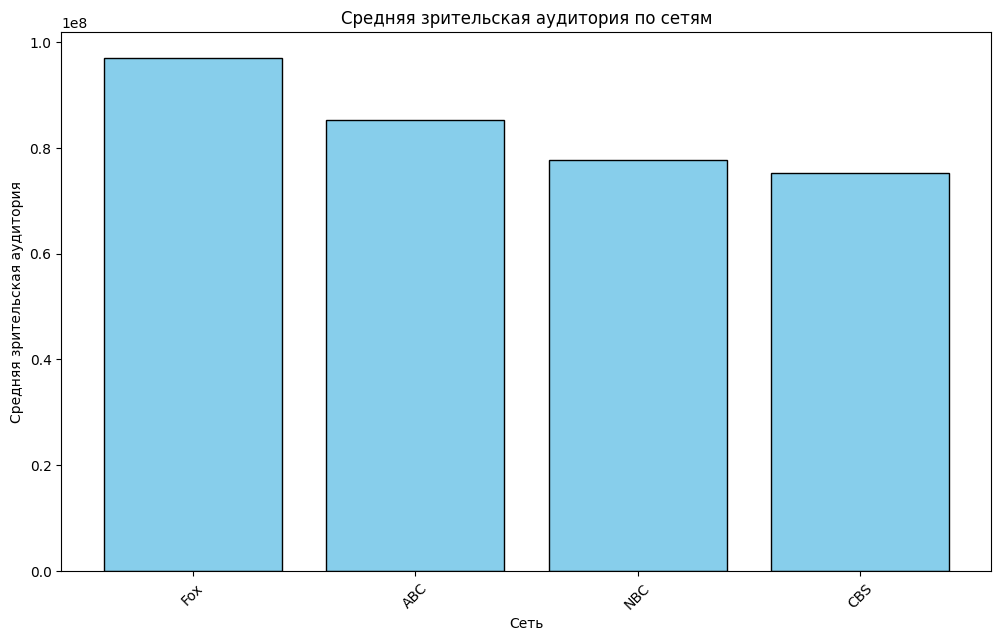

In [7]:
# # Предположим, у вас есть база данных "телевидение"
merged = pd.merge(super_bowls, tv, how='inner', on='super_bowl')
# Сгруппируйте данные по "сети" и рассчитайте среднюю аудиторию
grouped_network = merged.groupby('network')['avg_us_viewers'].mean().sort_values(ascending=False).reset_index()

# Рассчитайте среднюю зрительскую аудиторию для каждой сети.
plt.figure(figsize=(12, 7))
plt.bar(grouped_network['network'], grouped_network['avg_us_viewers'], color='skyblue', edgecolor='black')
plt.title('Средняя зрительская аудитория по сетям')
plt.xlabel('Сеть')
plt.ylabel('Средняя зрительская аудитория')
plt.xticks(rotation=45)
plt.show()

Чтобы узнать, какая сеть транслировала больше всего Суперкубков, вы можете подсчитать количество показов каждой сети во фрейме данных.

In [10]:

# Подсчитайте количество появлений в каждой сети.
network_counts = merged['network'].value_counts().reset_index()
network_counts.columns = ['network', 'count']

# Получите доступ к сети с наибольшим количеством Суперкубков
top_network = network_counts.iloc[0]

# Распечатайте результат
print(f"Сеть с наибольшим количеством Суперкубков: {top_network['network']}")

Сеть с наибольшим количеством Суперкубков: NBC


Чтобы создать диаграмму, показывающую взаимосвязь между сетями и затратами на рекламу, вы можете использовать линейчатый график, на котором каждая сеть представлена по оси x, а стоимость рекламы - по оси y.

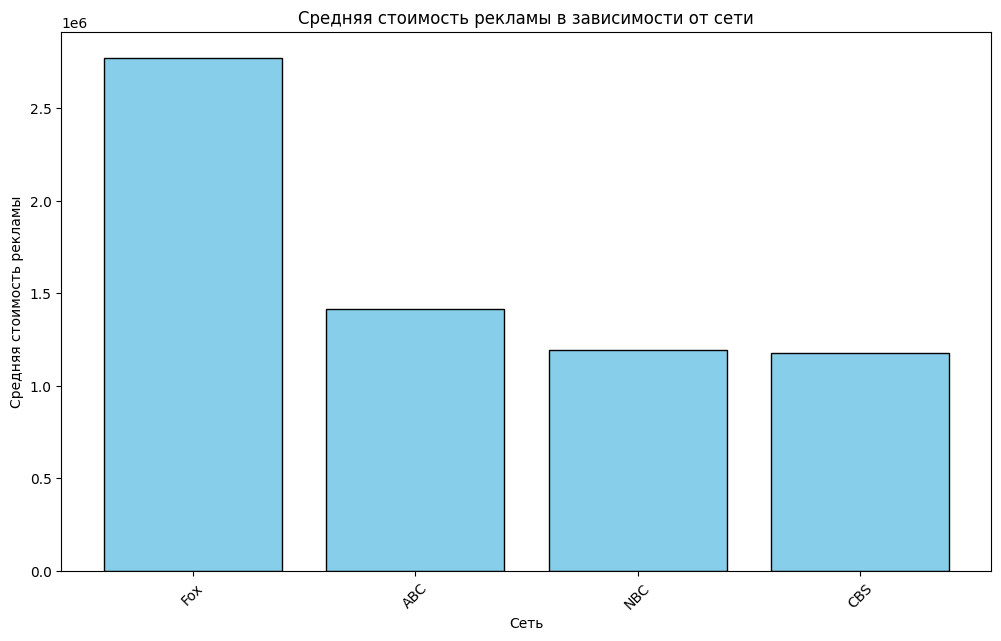

In [11]:
# # Предположим, что у вас есть база данных "телевидение"
merged = pd.merge(super_bowls, tv, how='inner', on='super_bowl')

# Сгруппируйте данные по "сети" и рассчитайте среднюю стоимость рекламы
average_ad_cost = merged.groupby('network')['ad_cost'].mean().sort_values(ascending=False).reset_index()


# Рассчитайте стоимость рекламы для каждой сети.
plt.figure(figsize=(12, 7))
plt.bar(average_ad_cost['network'], average_ad_cost['ad_cost'], color='skyblue', edgecolor='black')
plt.title('Средняя стоимость рекламы в зависимости от сети')
plt.xlabel('Сеть')
plt.ylabel('Средняя стоимость рекламы')
plt.xticks(rotation=45)
plt.show()

Чтобы объединить фреймы данных halftime_musicians и tv и затем определить 10 лучших исполнителей с наибольшим количеством просмотров, вам необходимо выполнить следующие действия:

Объединить фреймы данных на основе общего столбца, такого как номер или дата проведения Суперкубка.
Сгруппируйте объединенные данные по музыкантам (исполнителям) и подсчитайте общее количество просмотров для каждого исполнителя.
Отсортируйте исполнителей по их общему количеству просмотров.
Выберите 10 лучших исполнителей с наибольшим количеством просмотров.

In [16]:
# Объединить фреймы данных на основе общего столбца (например, номер Суперкубка)
merged = pd.merge(super_bowls, tv, how='inner', on='super_bowl')
merged = pd.merge(merged, halftime_musicians, how='inner', on='super_bowl')

# Разбивка по музыкантам и суммирование общей аудитории
musician_audience = merged.groupby('musician')['avg_us_viewers'].sum().reset_index()


# Выберите 10 лучших артистов с наибольшей общей аудиторией зрителей.
top_10_artists = musician_audience.nlargest(10, 'avg_us_viewers')
top_10_artists = top_10_artists.sort_values(by='avg_us_viewers', ascending=False)


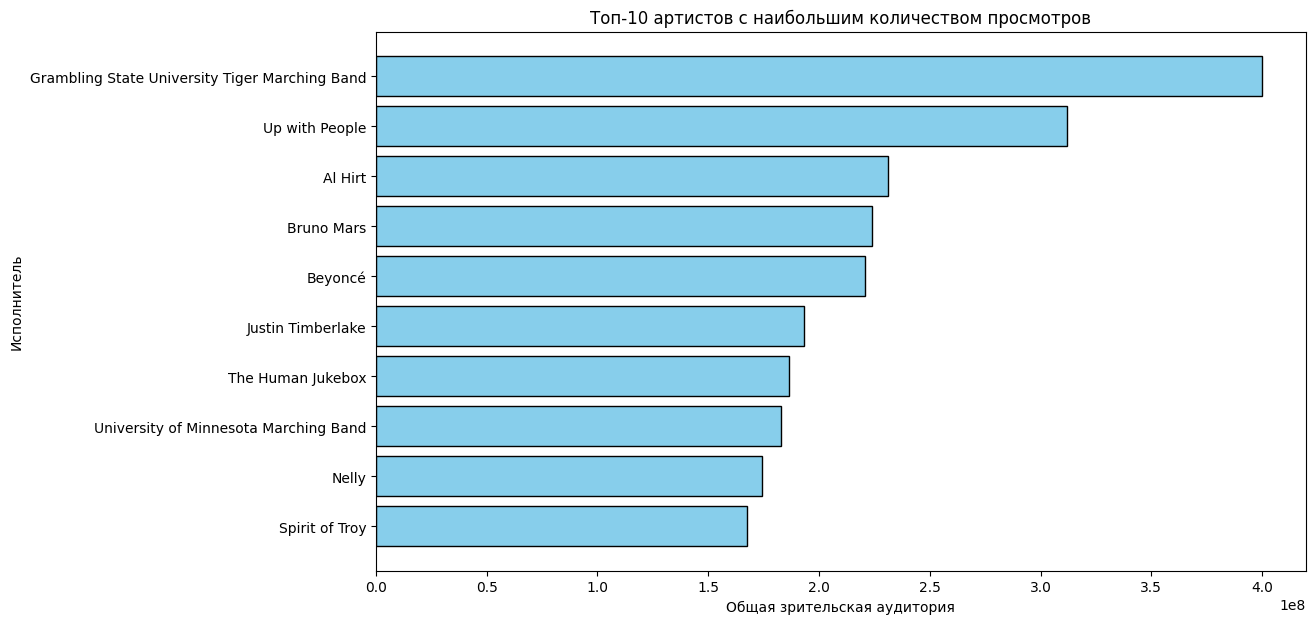

In [17]:
# Предположим, у вас есть серия top_10_artists, в которой представлены 10 лучших художников и их общая аудитория.
plt.figure(figsize=(12, 7))
plt.barh(top_10_artists['musician'], top_10_artists['avg_us_viewers'], color='skyblue', edgecolor='black')
plt.title('Топ-10 артистов с наибольшим количеством просмотров')
plt.xlabel('Общая зрительская аудитория')
plt.ylabel('Исполнитель')
plt.gca().invert_yaxis() 
plt.show()

Чтобы объединить фреймы данных halftime_musicians и tv и затем определить, какой исполнитель чаще всего появляется в сети, вы можете выполнить следующие действия:

Объедините фреймы данных на основе общего столбца, такого как номер или дата Суперкубка.
Сгруппируйте объединенный фрейм данных по исполнителю и сети, чтобы подсчитать количество появлений каждого исполнителя в каждой сети.
Найдите сеть, в которой каждый исполнитель появляется чаще всего.

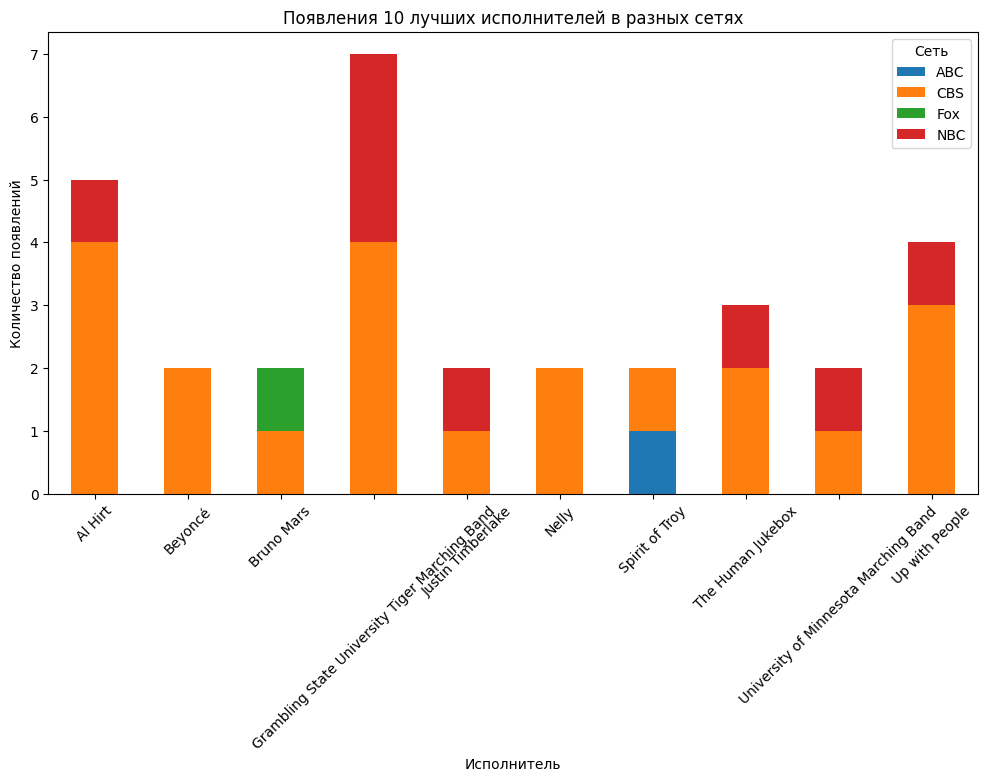

In [24]:
# Шаг 1: Найдите 10 лучших артистов с наибольшей аудиторией зрителей.
musician_audience = merged.groupby('musician')['avg_us_viewers'].sum().reset_index()
top_10_artists = musician_audience.nlargest(10, 'avg_us_viewers')['musician']

# # Шаг 2: Объедините фреймы данных halftime_musicians и tv
halftime_tv = pd.merge(halftime_musicians, tv, how='inner', on='super_bowl')


# # Шаг 3: Отфильтруйте объединенный фрейм данных по выступлениям 10 лучших исполнителей
filtered_halftime_tv = halftime_tv[halftime_tv['musician'].isin(top_10_artists)]


# # Шаг 4: Сгруппируйте отфильтрованный фрейм данных как по исполнителю, так и по сети
grouped_filtered = filtered_halftime_tv.groupby(['musician', 'network']).size().unstack().fillna(0)


# Шаг 5: Визуализируйте выступления 10 лучших артистов в разных сетях.
grouped_filtered.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Появления 10 лучших исполнителей в разных сетях')
plt.xlabel('Исполнитель')
plt.ylabel('Количество появлений')
plt.legend(title='Сеть')
plt.xticks(rotation=45)
plt.show()